In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import pickle
import random
from scipy.misc import imresize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import datetime
from skimage import transform, io
from sklearn.model_selection import train_test_split
size_image = 256


C:\ProgramData\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\tensor\lib\site-packages\tensorflow\pyth

In [2]:
Normalfolders = [
    'a', 'a (2)', 'a (3)','a (4)','a (5)','a (6)','a (7)','a (8)','a (9)','a (10)','a (11)','a (12)','a (13)','a (14)',
    'a (15)','a (16)','a (17)','a (19)','a (20)','a (21)','a (22)','a (23)','a (24)','a (25)'
]
TumorFolders = [
 'a (3)','a (4)','a (5)','a (6)','a (7)','a (8)','a (9)','a (10)','a (11)','a (12)','a (13)','a (14)',
    'a (15)','a (16)','a (17)','a (18)','a (19)','a (20)','a (21)','a (22)','a (23)','a (24)','a (25)',
    'a (26)','a (27)','a (28)','a (29)','a (30)','a (31)','a (32)','a (33)','a (35)','a (36)','a (37)',
    'a (38)','a (39)','a (40)','a (41)','a (42)','a (43)','a (44)','a (45)','a (46)','a (47)','a (48)',
    'a (49)','a (50)','a (51)','a (52)','a (53)','a (55)','a (56)','a (57)'
]
Normal = "C:/Users/Kitchen/OneDrive/Desktop/New folder/Normal class/"
Tumor = "C:/Users/Kitchen/OneDrive/Desktop/New folder/Tumor Class/"
DataAugmentation = "C:/Users/Kitchen/OneDrive/Desktop/New folder/Normal class/DataAugmentation/"

training_data = []
def load_images_from_folder(folder,label):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename),0)
        new_array = cv2.resize(img, (size_image,size_image))
        training_data.append([new_array, label])
        
for folder in Normalfolders:
    path = os.path.join(Normal+folder)
#     print(path)
    load_images_from_folder(path,0)

In [ ]:

# for i in range (700):
#     # rotating `a` counter clockwise by 90 degrees
#     rot_by_90=transform.rotate(TrainngData[i][0], 90)
#     TrainngData.append([rot_by_90,"0"])
#     # define a name for our new file
#     new_file_path = '%s/augmented_imageX90_%s.jpg' % (DataAugmentation, i)
#     # write image to the disk
#     io.imsave(new_file_path, rot_by_90)
#     # rotating `a` counter clockwise by 180 degrees
#     rot_by_180=transform.rotate(TrainngData[i][0], 180)
#     new_file_path = '%s/augmented_imageX180_%s.jpg' % (DataAugmentation, i)
#     # write image to the disk
#     io.imsave(new_file_path, rot_by_180)
#     TrainngData.append([rot_by_180,"0"])
print("Nothing")

In [3]:
print("Total Images before appending Tumor class: ",len(training_data))

for folder in TumorFolders:
    path = os.path.join(Tumor+folder)
#     print(path)
    count=load_images_from_folder(path,1)
print("Total Images after appending Tumor class: ",len(training_data))

Total Images before appending Tumor class:  1001
Total Images after appending Tumor class:  3439


In [ ]:
#shuffle the images to change data order
i = 0
while i<1001:
    TrainngData[i][0] = TrainngData[i][0]/255.0
    i+=1
print(i)



In [ ]:
i = 2401
size = len(TrainngData)
while i< size:
    TrainngData[i][0] = TrainngData[i][0]/255.0
    i+=1
print(i)

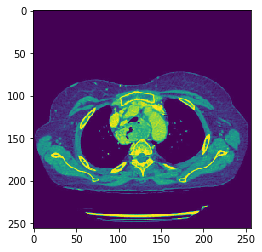

(256, 256)
(10, 15)
(10, 15, 1)


In [4]:
plt.imshow(training_data[100][0])
plt.show()
print(training_data[100][0].shape)
x = np.zeros((10, 15))
print(x.shape)    # This gives (10, 15)

y = np.reshape(x, (10, 15, 1))
print(y.shape)    # This gives (10, 15, 1)

In [17]:
random.shuffle(training_data)
n_files = 3439
allX = np.zeros((n_files, size_image, size_image), dtype='uint8')
ally = np.zeros((n_files), dtype='int32')
count =0

In [18]:
for features, label in training_data:
    allX[count] = features
    ally[count] = label
    count +=1
allX = np.array(allX).reshape(-1, size_image,size_image,1)

(256, 256, 1)


TypeError: Invalid shape (256, 256, 1) for image data

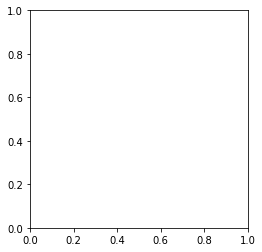

In [20]:
y = np.reshape(allX[1003], (256, 256,1))
print(y.shape)    # This gives (10, 15, 1)
plt.imshow(allX[1003])
plt.show()
print(ally[1003])
print(allX.shape)

In [ ]:
print(os.path.exists("X[ImagesX128-color].pickle"))
X.shape

In [ ]:
if(os.path.exists("X[ImagesX128-color].pickle")):
    pickle_in = open("X[ImagesX128-color].pickle", "rb")
    X = pickle.load(pickle_in)
    pickle_in.close()

    pickle_in = open("Y[Lables].pickle", "rb")
    Y = pickle.load(pickle_in)
    pickle_in.close()
    Y = np.array(Y)
else:
    pickle_out = open("X[ImagesX128-color].pickle", "wb")
    pickle.dump(X, pickle_out,protocol=2)
    pickle_out.close()
    
    pickle_out = open("Y[Lables].pickle", "wb")
    pickle.dump(Y, pickle_out,protocol=2)
    pickle_out.close()

# from sklearn.externals import joblib
# filename = 'finalized_classes.sav'
# joblib.dump(X, filename)  
# filename2 = 'finalized_labels.sav'
# joblib.dump(Y, filename2)  
# X = joblib.load(filename)
# Y = joblib.load(filename2)

In [21]:
NAME="Tumor-vs-normal-64-64-64-128{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorflow_callback = TensorBoard(log_dir='logs\\{}'.format(NAME), histogram_freq=1)
checkpoint_path = "Tumor64X3-128/normalvstumor.ckpt"

# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path,save_weights_only=True, monitor = "val_loss", verbose = 0)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(allX, ally, test_size = 0.2,random_state = 100)

In [23]:
print(X_train.shape)
model = Sequential()

model.add(Conv2D(64, (3,3),activation='relu', input_shape =X_train.shape[1:]))
model.add(Conv2D(16, (5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Conv2D(128, (2,2),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

(2751, 256, 256, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 64)      640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 250, 250, 16)      25616     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 123, 123, 32)      4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 120, 120, 128)     32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None

In [25]:
print(y_train.shape)
opt = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 32, validation_split = 0.2, epochs=10, callbacks = [tensorflow_callback,cp_callback])


(2751,)


ValueError: A target array with shape (2751, 1) was passed for an output of shape (None, 2) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

import os
from glob import glob

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.metrics import Accuracy
